<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_10_Convolutional_Neural_Network/CNN_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) on CIFAR10 Dataset

In [ ]:
%pip install \
  numpy==2.0.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0 \
  keras==3.10.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import keras
from keras import layers
from keras.datasets import cifar10
from keras.utils import to_categorical

## The CIFAR-10 Dataset


### Load CIFAR-10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

170498071/170498071 [==============================] - 14s 0us/step
X_train (50000, 32, 32, 3)
y_train (50000, 1)
X_test (10000, 32, 32, 3)
y_test (10000, 1)


### Visulize the CIFAR-10 data
Show randomly 100 images from the dataset.

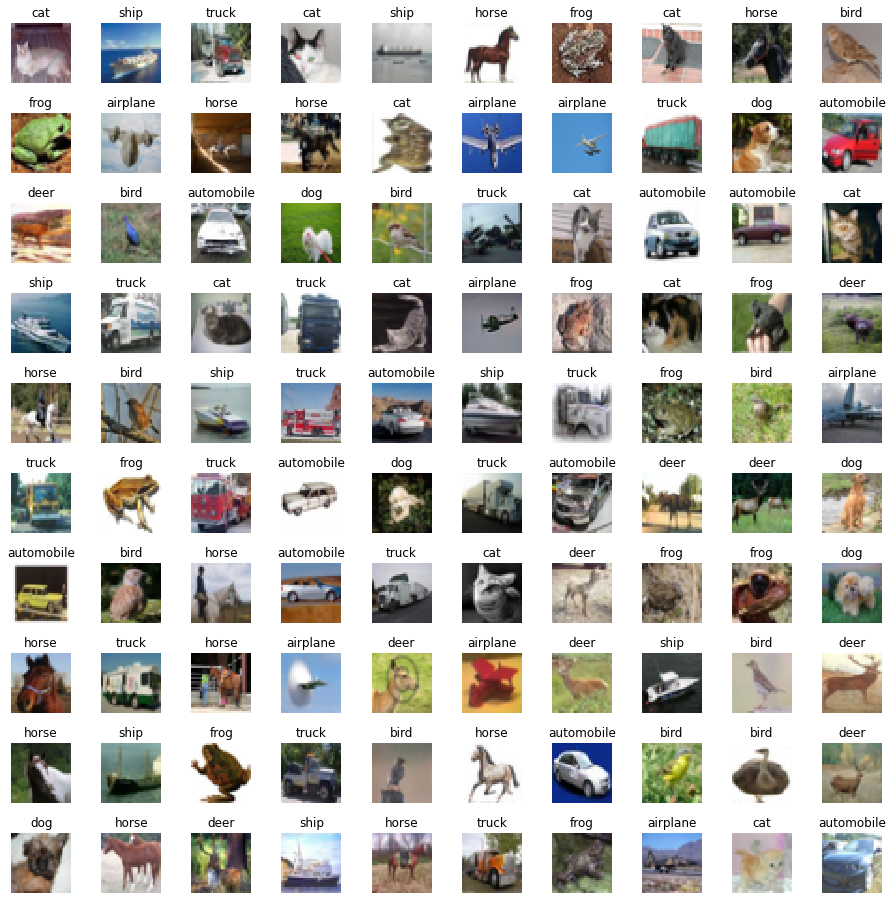

In [ ]:
def label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_random_100_images(data, label, prediction = None, prediction_provided = False):
    _, img_height, img_width, img_channels = data.shape
    _, axarr = plt.subplots(10,10,figsize=(16,16))
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    for i in range(10):
        for j in range(10):
           index = np.random.randint(data.shape[0])
           groundtruth_lable = label_names()[np.argmax(label[index])]
           if prediction_provided == True:
              predicted_lable = label_names()[np.argmax(prediction[index])]

           axarr[i,j].imshow(data[index].reshape((img_height, img_width, img_channels), order = 'F'), cmap="binary", interpolation="nearest")          
           axarr[i,j].axis('off')
           titleStr = groundtruth_lable
           if prediction_provided == True:
              titleStr = titleStr + "\nP:" + predicted_lable
           axarr[i,j].set_title(titleStr)
    plt.show()

input_shape = X_train.shape[1:]
plot_random_100_images(X_train, 
                       to_categorical(y_train))


### Build the CNN model

batch_size can be: 32, 64, 128, 256, 512...

Increase the batch_size for a powerful hardware spec machine; 
Reduce it for a less powerful one, otherwise will get error in fit().

In [ ]:
num_classes = 10
batch_size = 128
epochs = 100

In [ ]:
# Build a CNN model with preprocessing & augmentation
model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255),         # Normalize the images.

    # Light augmentation (performed only during training)
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),

    # Conv blocks
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Classifier head
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
], name="CIFAR10_CNN")

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),  # integer labels
    metrics=["accuracy"]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          1

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train.ravel(),
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=2,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
    ]
)

Epoch 1/100
391/391 [==============================] - 14s 14ms/step - loss: 1.8341 - accuracy: 0.3153 - val_loss: 1.4375 - val_accuracy: 0.4897
Epoch 2/100
391/391 [==============================] - 5s 12ms/step - loss: 1.4312 - accuracy: 0.4787 - val_loss: 1.2243 - val_accuracy: 0.5695
Epoch 3/100
391/391 [==============================] - 5s 12ms/step - loss: 1.2716 - accuracy: 0.5448 - val_loss: 1.0721 - val_accuracy: 0.6227
Epoch 4/100
391/391 [==============================] - 5s 12ms/step - loss: 1.1832 - accuracy: 0.5838 - val_loss: 0.9987 - val_accuracy: 0.6514
Epoch 5/100
391/391 [==============================] - 5s 13ms/step - loss: 1.1080 - accuracy: 0.6128 - val_loss: 0.9749 - val_accuracy: 0.6677
Epoch 6/100
391/391 [==============================] - 5s 12ms/step - loss: 1.0635 - accuracy: 0.6283 - val_loss: 0.9326 - val_accuracy: 0.6782
Epoch 7/100
391/391 [==============================] - 5s 13ms/step - loss: 1.0231 - accuracy: 0.6452 - val_loss: 0.8787 - val_accuracy

### Visualize the Results

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


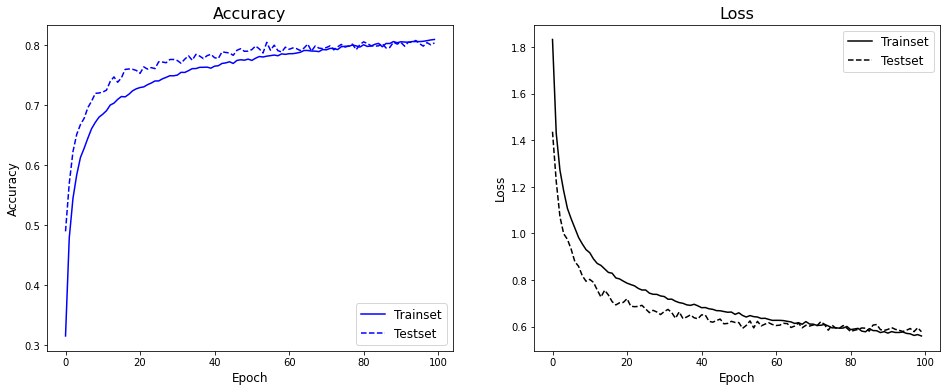

In [ ]:
# summarize history for accuracy and history for loss
fig = plt.figure(1, figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label="Trainset", c='blue')
plt.plot(history.history['val_accuracy'], label="Testset", c='blue', ls='--')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='best', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Trainset", c='k')
plt.plot(history.history['val_loss'], label="Testset", c='k', ls='--')
plt.title('Loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("cnn_on_cifar-10.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Save and Load the CNN Model

In [ ]:
# Save the model
model.save('cnn_on_cifar-10.h5')

In [ ]:
# Load the model
model = keras.models.load_model("cnn_on_cifar-10.h5")
model.summary()

### Evaluation

In [ ]:
score = model.evaluate(X_test, y_test.ravel(), verbose=0)
print(f"Test loss:     {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.5778 - accuracy: 0.8039
Test loss: 0.5777616500854492
Test accuracy: 0.8039000034332275


In [ ]:
# obtain sklearn metrics
y_prob = model.predict(X_test, batch_size=batch_size, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

a_score = metrics.accuracy_score(y_test.ravel(), y_pred)
c_matrix = metrics.confusion_matrix(y_test.ravel(), y_pred)
c_report = metrics.classification_report(y_test.ravel(), y_pred)

print("\nAccuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

313/313 [==============================] - 1s 2ms/step
Accuracy Score:
 0.8039
Confusion matrix:
 [[831   9  23  16   7   0   5  14  63  32]
 [  9 876   0   3   1   2   3   1  15  90]
 [ 82   6 654  47  72  43  52  25  11   8]
 [ 22   6  48 697  39  98  35  29   9  17]
 [ 18   2  31  61 784  11  21  63   6   3]
 [ 11   1  32 199  31 652   5  59   2   8]
 [ 11   3  38  62  29  14 826   4   8   5]
 [ 11   5  17  33  26  19   0 880   3   6]
 [ 37  12   5   3   2   1   3   1 915  21]
 [ 12  26   2   9   0   0   2   5  20 924]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.93      0.88      0.90      1000
           2       0.77      0.65      0.71      1000
           3       0.62      0.70      0.65      1000
           4       0.79      0.78      0.79      1000
           5       0.78      0.65      0.71      1000
           6       0.87      0.83      0.85      1000
           7  